In [15]:
## Метеостанция, находящаяся в ботаническом саду Сиднея, регистрирует количество выпадающих осадков с 1885 года. 
# Среднее годовое количество осадков за период с 1885 по 2015 включительно составляет 1197.69 мм, 
# выборочная дисперсия — 116182.2. Считая, что годовое количество осадков — случайная величина, не меняющаяся во времени и 
# имеющая нормальное распределение, постройте интервал, который с вероятностью 99.7% будет содержать количество осадков,
# которые выпадут в 2016 году. Чему равна его верхняя граница? Округлите ответ до двух знаков после десятичной точки.

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

years = np.arange(1885, 2016, 1)
mu = 1197.69
disp = 116182.2
sigma = math.sqrt(disp)
print sigma

340.855101179


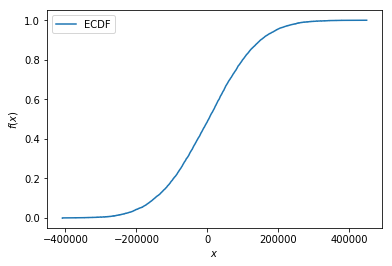

In [49]:
# Сгенерируем выборку объёма 10000 из стандартного нормального распределения 
norm_rv = sts.norm(mu, disp)
sample = norm_rv.rvs(10000)
# Эмпирическая функция распределения для полученной выборки:
x = np.linspace(-4,4,10000)


# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.show()

C:\dev\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'$x$')

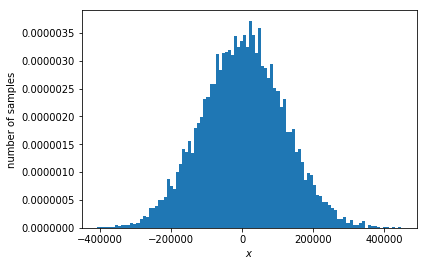

In [50]:
# Гистограмма выборки:
plt.hist(sample, bins=100, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

Text(0.5,0,'$x$')

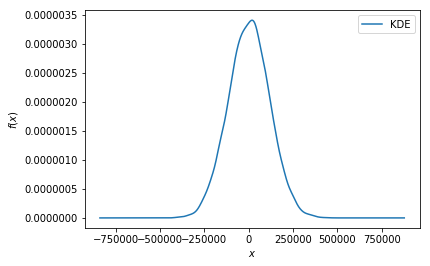

In [51]:
# Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')


plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [58]:
# Решение - 99,7% - это 3-сигма

print '99,77 - 3 sigma = mu + 3 * sigma:', mu + 3 * sigma, ', оркугление:', round( mu + 3 * sigma, 2)


99,77 - 3 sigma = mu + 3 * sigma: 2220.25530354 , оркугление: 2220.26


In [64]:
# Задача 2.
# Оцените значение параметра  — среднеквадратического отклонения нормального распределения, которым, 
# согласно центральной предельной теореме, можно аппроксимировать распределение среднего количества осадков за год 
# из предыдущей задачи. Округлите ответ до двух знаков после десятичной точки.

sigma_n = math.sqrt(disp/len(years))
print 'Cреднеквадротичное отклонение', sigma_n, ', оркугление:', round(sigma_n, 2)

среднеквадротичное открлоение 29.7806484634 , оркугление: 29.78


In [65]:
# Постройте приближённый 99.7% доверительный интервал для среднего количества осадков за год. Чему равен верхний 
# доверительный предел? Округлите ответ до двух знаков после десятичной точки.
print 'mu + 3 * sigma_n', mu + 3 * sigma_n, ', оркугление:', round(mu + 3 * sigma_n, 2)

mu + 3 * sigma_n 1287.03194539 , оркугление: 1287.03
